# View Performance of Each Emitter Over Time

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

import pickle

### Load Data

In [56]:
with open('sample_data/emitter_pulse.pkl', 'rb') as f:
    pulses = pickle.load(f)
event_label = ['NOT ADDED', 'IMPROVED', 'DISCOVERED']
emitter_label = [0.2, 0.1, 0.05, 0.025] # sigma of gaussian emitter

### Data as Percentages

In [60]:
def norm_pulse(pulse):
    n_children  = np.sum(pulse,axis=1)
    norm_factor = np.tile(n_children,(3,1)).T
    pulse /= norm_factor
    return pulse

stat = [norm_pulse(np.array(p)) for p in pulses]

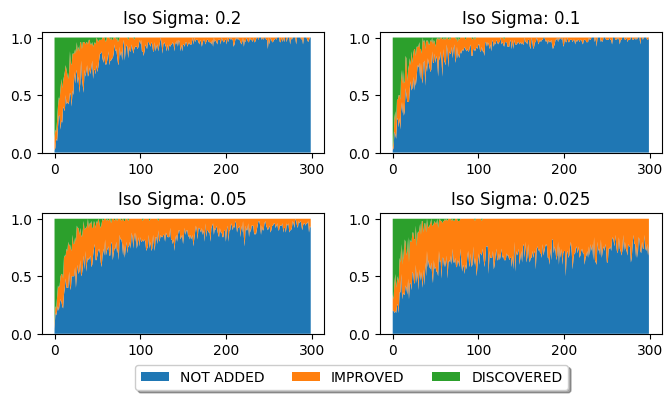

In [82]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,4),dpi=100)
ax = ax.flatten()

for i, pulse in enumerate(stat):
    x = np.arange(len(pulse))
    y = pulse
    ax[i].stackplot(x, y[:,0], y[:,1], y[:,2], labels=event_label)
    ax[i].set_title(f"Iso Sigma: {emitter_label[i]}")


plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax[-2].legend(loc='upper center', bbox_to_anchor=(1.1, -0.2), fancybox=True, shadow=True, ncol=3)